In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,SimpleRNN,LSTM

In [3]:
ptr=open('data.txt.txt')

In [4]:
data=ptr.read().lower()

In [5]:
len(data)

600893

 Creating vocabulary of unique characters

In [6]:
chars=sorted(list(set(data)))  #this is our vocabulary in txt

In [7]:
len(chars)

57

In [8]:
# Now creating a dictionary mapping char to indexes and indexes to chars
char_to_index={ c:index  for index,c in enumerate(chars)}

In [9]:
index_to_char={index:c for index,c in enumerate(chars) }
#char_to_index

In [10]:
total_index=[char_to_index[char] for char in data]

`Next, let’s cut the corpus into chunks of 40 characters, spacing the sequences by 3 characters. Additionally, we will store the next character (the one we need to predict) for every sequence:

In [11]:
sequence_len=40
step=3
sentences=[]
next_chars=[]
for i in range(0,len(data)-sequence_len,step):
    sentences.append(data[i:i+sequence_len])
    next_chars.append(data[i+sequence_len])
print(' NUmber of training examples ',len(sentences))

 NUmber of training examples  200285


In [12]:
sentences[0] , next_chars[0]

('preface\n\n\nsupposing that truth is a woma', 'n')

###  now let us prepare the one hot encoded data in the form of this dimensions 
     rows *   sequence_ len *  len(chars)

In [13]:
x=np.zeros((len(sentences),sequence_len,len(chars)) )

In [14]:
x.shape

(200285, 40, 57)

In [15]:
y=np.zeros((len(sentences),len(chars)))

In [16]:
y.shape        # output also will be one hot enxcoded that is binary 1 will indicate
               # in it row the output word

(200285, 57)

In [17]:
temp=[]
for i,sentence in enumerate(sentences):
    # going on each sentence #i contains the index and sentencedata
    for t,char in enumerate(sentence):   # t is index of  t'th word in ith sentence #char is that character
        x[i][t][char_to_index[char]]=1
    y[i][char_to_index[next_chars[i]]]=1

We have 200285 training examples, each sequence has length of 40 with 57 unique chars.

In [18]:
model=Sequential()

Using Lstm

In [153]:
len(chars)

57

In [20]:
model.add(LSTM(128,input_shape=( sequence_len, len(chars)  )))
model.add( Dense( len(chars) , activation='softmax'))


In [21]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
#as it is going to take long time so i am going to save history"sushhil"

In [24]:
history=model.fit(x,y,epochs=5,batch_size=128).history


Epoch 1/5
200285/200285 [==============================] - 894s 4ms/step - loss: 0.0146

In [117]:
val=x[20].reshape((1,x[7].shape[0],x[2].shape[1]))

In [118]:
temp=model.predict(val)

In [119]:
index_to_char[temp.argmax()]

'i'

In [116]:
sentences[20] , next_chars[20]

('re not ground\nfor suspecting that all ph', 'i')

In [152]:
x[0].shape[0]

40

In [90]:
axisX=np.array(history['loss']) 
axisY=([ i  for i in range(1,6)])

In [91]:
axisX,axisY

(array([0.01459389, 0.01324695, 0.01262646, 0.01220097, 0.01187205]),
 [1, 2, 3, 4, 5])

In [92]:
from matplotlib import pyplot as plt

In [108]:
plt.plot(axisY,axisX )
plt.title(" loss Vs Iteration")
plt.xlabel(" Iterations ")
plt.ylabel(" loss Values ")

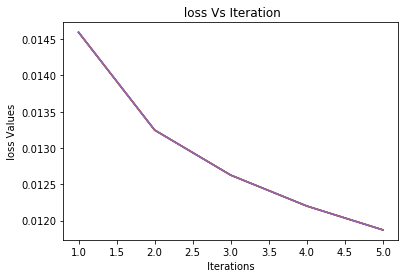

In [109]:
plt.show()

 SO this is time now to test our model on custom inputs
 so let us first prepare our input

In [123]:
def make_text_input(text):
    x=np.zeros((1,sequence_len,len(chars)))
    
    for t, char in enumerate(text):
        x[0][t][char_to_index[char]]=1
    return x 

In [ ]:
# one sentence should be  40 characters long

In [146]:
def prediction(text):
    generated=text
    ans=text
    while(True):
        x=make_text_input(text)
        output=index_to_char[(model.predict(x)).argmax() ]
        
        text=text[1:]+output
        ans=ans+output
        
        
        if(len(ans)>=100 ):
            return ans
        
        
        

In [204]:
from nltk.tokenize import sent_tokenize,word_tokenize
ans=word_tokenize("sushil  ravi")
for word in ans:
    print(word)

sushil
ravi


In [222]:
def withoutNewLine(text):
    output=""
    fn=['\n']
    for word in word_tokenize(text):
        if(word not in fn):
            output=output+word+" "
    return output

In [223]:
withoutNewLine(" this is hot \n")

'this is hot '

In [239]:
print('Series No  '  )
print()
for i,test in enumerate(sentences[20:50] ):
    print( i,' " DATA IS "   ', withoutNewLine(test) )
    print()
    print(' " ACTUAL output " ',(next_chars[i]), ' " MYOUTPUT "  ',  index_to_char[ (model.predict( x[i].reshape( 1, 40 ,len(chars)))).argmax()] )
    print()
    print()

Series No  

0  " DATA IS "    re not ground for suspecting that all ph 

 " ACTUAL output "  n  " MYOUTPUT "   n


1  " DATA IS "    not ground for suspecting that all philo 

 " ACTUAL output "  w  " MYOUTPUT "   a


2  " DATA IS "    ground for suspecting that all philosop 

 " ACTUAL output "  t  " MYOUTPUT "   t


3  " DATA IS "    ound for suspecting that all philosopher 

 " ACTUAL output "  h  " MYOUTPUT "   h


4  " DATA IS "    d for suspecting that all philosophers , 

 " ACTUAL output "  ?  " MYOUTPUT "    


5  " DATA IS "    or suspecting that all philosophers , in 

 " ACTUAL output "  s  " MYOUTPUT "   t


6  " DATA IS "    suspecting that all philosophers , in so 

 " ACTUAL output "  h  " MYOUTPUT "   h


7  " DATA IS "    pecting that all philosophers , in so far 

 " ACTUAL output "  e  " MYOUTPUT "   e


8  " DATA IS "    ting that all philosophers , in so far as 

 " ACTUAL output "  o  " MYOUTPUT "   o


9  " DATA IS "    g that all philosophers , in so far as th